In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

# Modelisation and experimental context

We want to draw the random statics of multi-colocalization from RNA of N different populations with different abundancies (a1,a2...aN).

Let's try to modelize the spatial distributions of RNAs as an urn drawing problem.

**Context**

Let us consider *V* differently **numbered balls** in the urn. In our experiement a cell has *V* pixels we can resolve to find our RNAs, in other words V different positions. Each time a ball is drawn (e.g a position) it is **replaced** in the urn for the next RNA.

For each RNA we draw *aN* positions. Let's try to sequentially draw each positions.

## First distribution, N = 1

For the first distribution the probability to co-localize with any other distribion will obviously be 0. But we can have a look at the probability of self-colocalization.

At any draw the probability of have a chosen position is 1 out V positions :  *1/V* since positions are replaced in the urn.

Let us call k the iterations of drawing, the number of draws to perform is *a1*.

* At k=1, first drawing :

    The probability of self-colocalization is 0

* At k=2, :

    The probability of picking the position drawn in k=1 is **1/V** (ie self colocalization probality).
Or in other word the probablity of picking a new position is **1-1/V**.

* At k=3 : 

    Things complexify as the probability now depends on the outcome of k=2.
To adress this let us consider the probablity the position we drew was never drawn.
So this specific postion has 1/V chance to be drawn at first draw and then again 1/V, we can view this a binomial trial without any sucess
so this probability is (1/V)².

* At k>2 :

     the probability that at draw k the picked position was never drawn is a binomial trial without any sucess : **(1/V)^k**.


In [154]:
V = 200
a1 = 100
experiment_number = 10000


In [155]:
random_generator = np.random.default_rng()
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws

array([[ 63, 184,  49, ..., 150, 161,  82],
       [ 18,  18,  55, ...,  44, 117, 186],
       [ 44,  21, 191, ...,  85,  38, 196],
       ...,
       [137, 156,  87, ..., 173,  73, 123],
       [125,  67,  48, ...,  18,  13, 130],
       [157,  51,  54, ..., 171, 166,  89]])

In [156]:
colocalisation_count = []
for experiment in draws :
    colocalisation_count.append(len(experiment) - len(np.unique(experiment)))

expected_number_colocalisation :  21.154087298145583


(0.0, 100.0, 0.0, 0.12684)

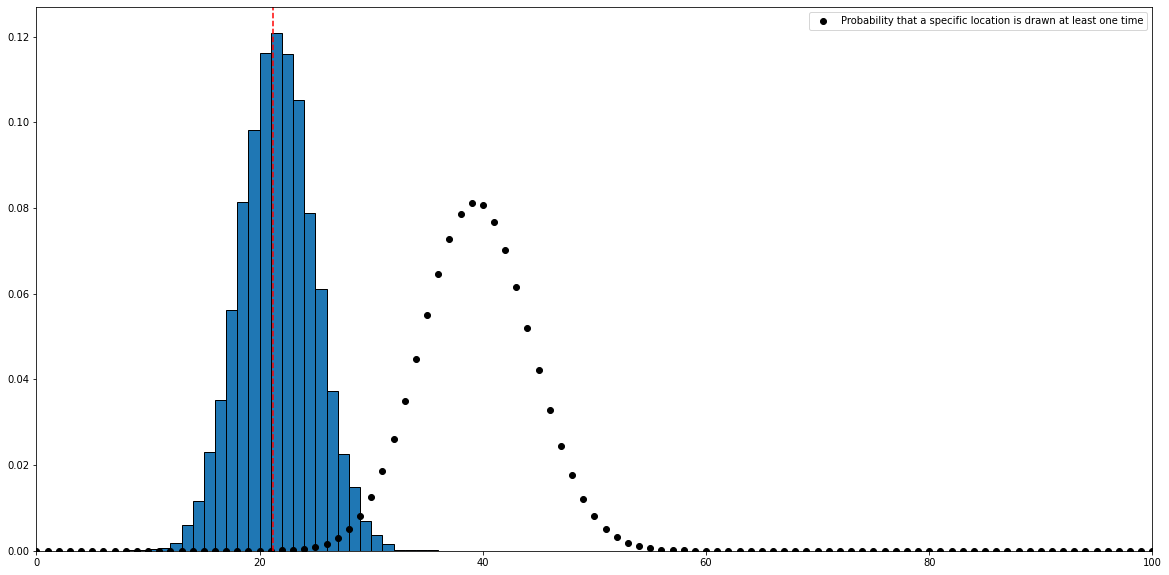

In [157]:
p = 1-(1-1/V)**a1 #

x = np.arange(a1 +1 )
pmf = binom.pmf(x,a1, p)

expceted_number_colocalisation = a1- V*p

print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True)

ax.set_xlim(0,a1)
ax.plot(x, pmf, 'ok', label= "Probability that a specific location is drawn at least one time")
xmin,xmax,ymin,ymax = plt.axis()
ax.plot([expceted_number_colocalisation,expceted_number_colocalisation],[ymin,ymax], '--r')
ax.legend()

plt.axis([xmin,xmax,ymin,ymax])





## Two distribution, N= 2

In [158]:
V = 200
a1 = 100
a2 = 100
experiment_number = 100000

Expected_number_different_a1_positions = V*(1-(1-(1/V))**a1)
Expected_number_different_a1_positions

78.84591270185442

In [159]:
random_generator = np.random.default_rng()
a_1_draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a2))
draws

array([[156, 111,  92, ..., 133, 200,   5],
       [132, 183,  10, ...,  44,  94, 137],
       [ 37,  33,   2, ...,  92,  44, 170],
       ...,
       [167,  67, 163, ...,  64,  27,  23],
       [156,  67, 152, ..., 161,  22,  35],
       [ 77,  92,  40, ...,  72, 104, 104]])

In [160]:
colocalisation_count = []
different_pairs = []
for experiment, a_1_sample in zip(draws, a_1_draws) :
    
    colocalisation_count.append(len(
        experiment[np.isin(experiment, a_1_sample)]
    ))

    different_pairs.append(len(
        np.unique(experiment[np.isin(experiment, a_1_sample)])
    ))

expected_number_colocalisation :  21.154087298145583
expected_number_of_unique_pairs :  87.74600882688591


(0.0, 100.0, 0.0, 0.10980454545454565)

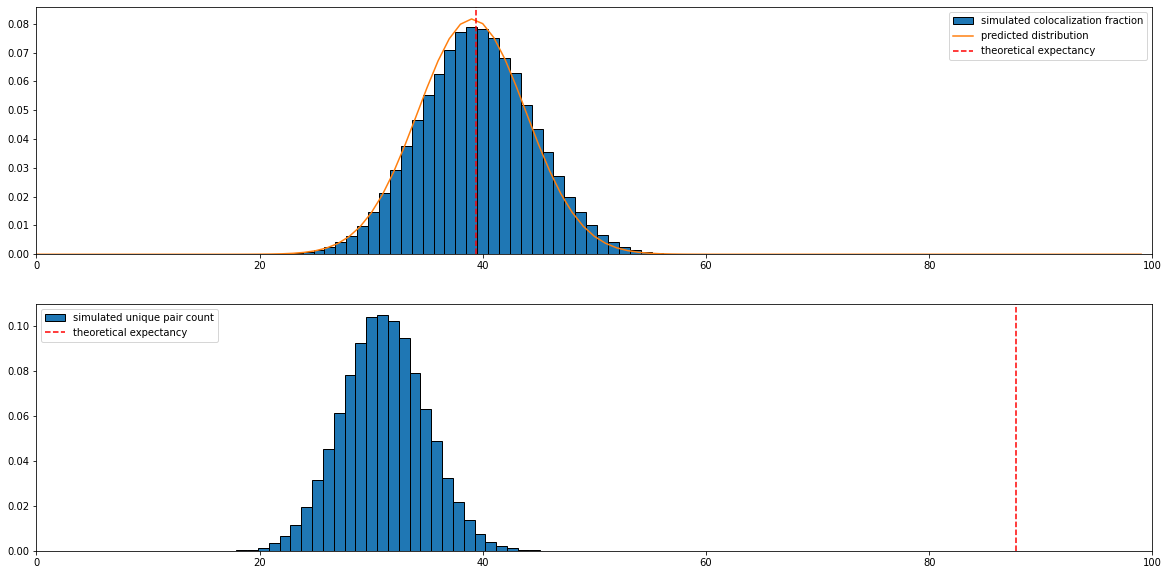

In [161]:
# p = 1-(1-1/V)**a1 #

# x = np.arange(a1 +1 )
# pmf = binom.pmf(x,a1, p)


print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
top,bot = fig.subplots(2,1)

#Co-localisation fraction
expected_colocalization_fraction = (a2*Expected_number_different_a1_positions)/V
std = np.sqrt(expected_colocalization_fraction* (1-Expected_number_different_a1_positions/V))

count,bins,_ =top.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True, label='simulated colocalization fraction')

top.plot(norm.pdf(np.linspace(0,a2,a2), expected_colocalization_fraction, std), label= 'predicted distribution')

xmin,xmax,ymin,ymax = top.axis()
top.plot([expected_colocalization_fraction,expected_colocalization_fraction],[ymin,ymax], '--r', label= 'theoretical expectancy')
top.legend()
top.axis([0,a2,ymin,ymax])


#Cluster number forming pairs
expected_number_of_unique_pairs = a2 - Expected_number_different_a1_positions**2*(1-(1-1/V)**a2)/V
print("expected_number_of_unique_pairs : ",expected_number_of_unique_pairs)

bot.hist(different_pairs, edgecolor='black', bins=len(np.unique(different_pairs)), align='mid', density=True, label='simulated unique pair count')
xmin,xmax,ymin,ymax = bot.axis()
bot.plot([expected_number_of_unique_pairs,expected_number_of_unique_pairs],[ymin,ymax], '--r', label= 'theoretical expectancy')
bot.legend()
bot.axis([0,a2,ymin,ymax])
